In [77]:
import os
import sys
import cv2
import pandas as pd
import numpy as np
import json
import shutil
import openslide
import matplotlib.pyplot as plt

In [129]:
anno_path = '/hdd/sd2/data/TCT/biaozhu/QL全部标注/270例/TASK_776_20190826142222/影像标注结果.csv'
data_path = '/ssd2/yuyue/python/0630/4f102f333ca0166ba2505923557d216cd585906d/'
scan_txt = '/ssd2/yuyue/python/0630/scantxt/4f102f333ca0166ba2505923557d216cd585906d/Scan.txt'
slide = openslide.OpenSlide('/ssd2/yuyue/python/4f102f333ca0166ba2505923557d216cd585906d.svs')
df = pd.read_csv(anno_path)

In [30]:
def num_str(num, leng):
    num = str(num)
    str1 = ''
    while len(str1) < leng-len(num):
        str1 += '0'
    return str1 + num

def dict_(img_list):
    map_ = {}
    count = 1
    for row in range(1, 100):
        for col in range(1, 100):
            img_name = 'IMG' + num_str(str(row), 3) + 'x' + num_str(str(col), 3) + '.JPG'
            if img_name in img_list:
                map_[img_name] = count
                count += 1
            else:
                break
    return map_

In [26]:
uid_t = '4f102f333ca0166ba2505923557d216cd585906d'
map_anno = {}
for i in range(len(df)):
    uid = df['序列编号'].iloc[i]
    anno = df['影像结果'].iloc[i]
    annos = json.loads(anno)
    if uid == uid_t:
        xmin = int(annos['point1']['x'])
        ymin = int(annos['point1']['y'])
        xmax = int(annos['point2']['x'])
        ymax = int(annos['point2']['y'])
        z = annos['point2']['z']
        if z not in map_anno:
            map_anno[z] = [(xmin, ymin, xmax, ymax)]
        else:
            map_anno[z].append((xmin, ymin, xmax, ymax))
        
        

In [46]:
for img_name in os.listdir(data_path):
    try:
        new_img_name = num_str(map_img[img_name], 6) + '.jpg'
    except:
        continue
    src = os.path.join(data_path, img_name)
    dst = os.path.join(data_path, new_img_name)
    os.rename(src, dst)

In [31]:
map_img = dict_(os.listdir(data_path))

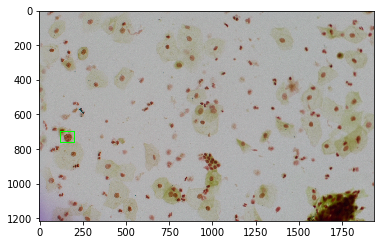

In [86]:
img = cv2.imread('/ssd2/yuyue/python/0630/4f102f333ca0166ba2505923557d216cd585906d/000167.jpg')
plt.imshow(cv2.rectangle(img, (124, 700), (206, 764), (0, 255, 0), 3))

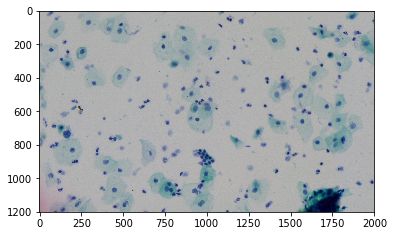

In [103]:
img = slide.read_region((27998-43*6, 5462),0,(2000, 1200))
img = np.array(img)
img = cv2.cvtColor(img,cv2.COLOR_RGBA2RGB)
plt.imshow(img)

In [84]:
map_anno

{167: [(124, 700, 206, 764)],
 194: [(854, 274, 933, 332)],
 286: [(526, 734, 658, 814)],
 289: [(198, 40, 271, 116)],
 344: [(755, 909, 940, 1072)],
 350: [(1682, 506, 1881, 669)],
 384: [(707, 821, 834, 986)],
 457: [(216, 768, 406, 1021)],
 465: [(1237, 425, 1395, 625)],
 467: [(320, 364, 461, 489)],
 470: [(582, 34, 702, 182)],
 531: [(102, 674, 196, 782)],
 657: [(123, 559, 197, 608)],
 1060: [(575, 369, 851, 553)],
 1093: [(1130, 329, 1184, 391)],
 1095: [(985, 868, 1073, 950)]}

In [143]:
def parse_txt(scan_txt):
    scan = []
    with open(scan_txt, 'r') as f:
        lines = f.readlines()
        for line in lines:
            scan.append(line)

    for idx, line in enumerate(scan):
        if "[Images]" in line:
            start = idx + 1
        elif 'Stage' in line:
            end = idx - 1

    map_init = {}
    map_rc = {}

    row_max, col_max = 0, 0
    for i, idx in enumerate(range(start, end, 2)):
        r = int(scan[idx].strip().split('x')[0][3:6])
        c = int(scan[idx].strip().split('x')[1][0:3])
        if r > row_max:
            row_max = r
        if c > col_max:
            col_max = c
        y_init = int(scan[idx].strip().split('=')[1])
        x_init = int(scan[idx+1].strip().split('=')[1])
        map_rc[(r, c)] = (x_init, y_init)
        map_init[i+1] = (x_init, y_init)
    row_diff = map_rc[(1,2)][1] - map_rc[(1,1)][1]
    col_diff = map_rc[(2,1)][0] - map_rc[(1,1)][0]
    return row_max, col_max, col_diff, row_diff, map_init

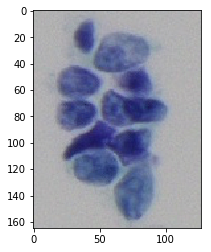

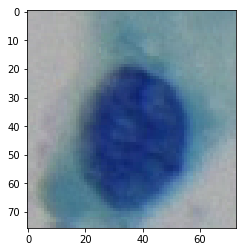

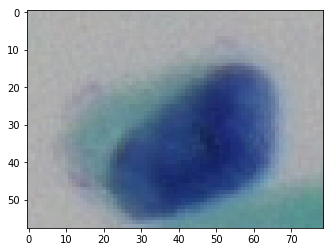

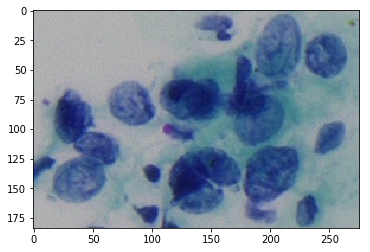

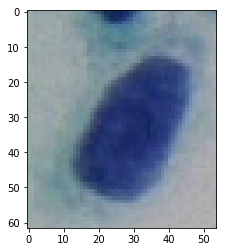

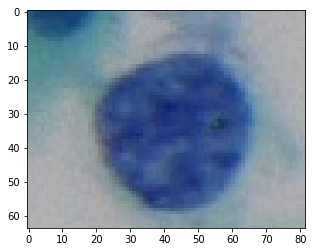

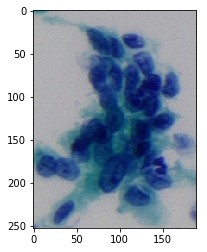

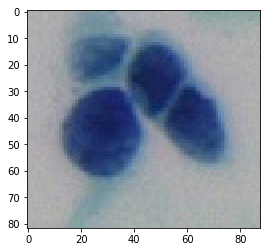

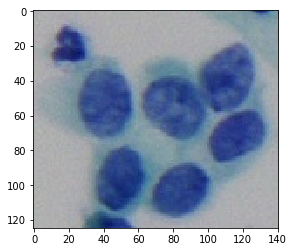

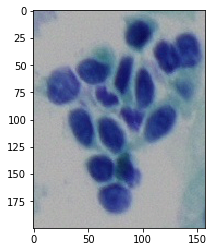

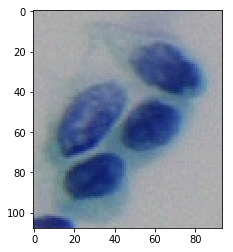

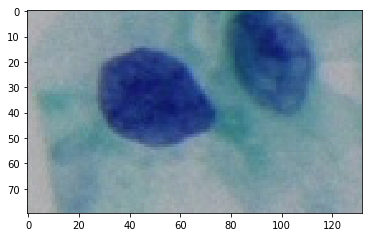

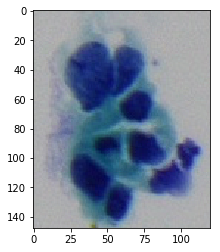

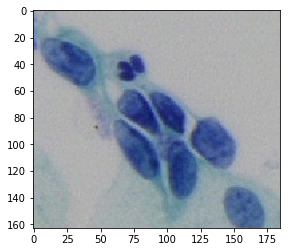

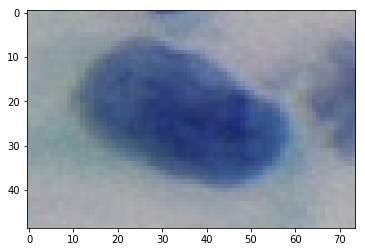

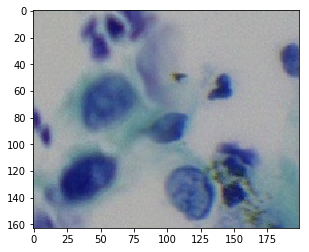

In [150]:
import os
import sys
import cv2
import pandas as pd
import numpy as np

def parse_txt(scan_txt):
    scan = []
    with open(scan_txt, 'r') as f:
        lines = f.readlines()
        for line in lines:
            scan.append(line)

    for idx, line in enumerate(scan):
        if "[Images]" in line:
            start = idx + 1
        elif 'Stage' in line:
            end = idx - 1

    map_init = {}
    map_rc = {}

    row_max, col_max = 0, 0
    for i, idx in enumerate(range(start, end, 2)):
        r = int(scan[idx].strip().split('x')[0][3:6])
        c = int(scan[idx].strip().split('x')[1][0:3])
        if r > row_max:
            row_max = r
        if c > col_max:
            col_max = c
        y_init = int(scan[idx].strip().split('=')[1])
        x_init = int(scan[idx+1].strip().split('=')[1])
        map_rc[(r, c)] = (x_init, y_init)
        map_init[i+1] = (x_init, y_init)
    row_diff = map_rc[(1,2)][1] - map_rc[(1,1)][1]
    col_diff = map_rc[(2,1)][0] - map_rc[(1,1)][0]
    return row_max, col_max, col_diff, row_diff, map_init


def get_initpos(map_, z, row_max, col_max, col_diff, row_diff):
    x_init, y_init = map_[z]
    if row_diff <= 0:
        row_res = 0
    if col_diff <= 0:
        col_res = 0
    if row_diff > 0:
        row_res = (col_max-1)*row_diff
    if col_diff > 0:
        col_res = (row_max-1)*col_diff
    x_init = x_init-col_res
    y_init = y_init-row_res
    return x_init, y_init


for z in map_anno:
    bboxes = map_anno[z]
    x_init, y_init = map_init[z]
    if row_diff <= 0:
        row_res = 0
    if col_diff <= 0:
        col_res = 0
    if row_diff > 0:
        row_res = (col_max-1)*row_diff
    if col_diff > 0:
        col_res = (row_max-1)*col_diff
    for bbox in bboxes:
        xmin, ymin, xmax, ymax = bbox[0], bbox[1], bbox[2], bbox[3]
        
        img = slide.read_region((x_init-col_res+xmin, y_init-row_res+ymin),0,(xmax-xmin, ymax-ymin))
        img = np.array(img)
        img = cv2.cvtColor(img,cv2.COLOR_RGBA2RGB)
        plt.imshow(img)
        plt.show()
    

In [62]:
start, end

(26, 2667)

In [61]:
len(scan)

6629

In [65]:
df

,用户手机号,用户姓名,影像结果编号,检查编号,序列编号,开始时间,提交时间,自定义内容,阴阳性,病灶,影像工具,影像结果类型,影像结果,恶性细胞分类(更新),TCT病灶类型
0,13661907264,徐婷,429222,4f102f333ca0166ba2505923557d216cd585906d1,4f102f333ca0166ba2505923557d216cd585906d,2019-08-19 12:57:09,2019-08-19 14:11:05,NaN,NaN,ANNO9,RECTANGLE,2,"{""point1"":{""x"":124.53818181818178,""y"":700.8581...",2,1
1,13661907264,徐婷,429223,4f102f333ca0166ba2505923557d216cd585906d1,4f102f333ca0166ba2505923557d216cd585906d,2019-08-19 12:57:09,2019-08-19 14:11:05,NaN,NaN,ANNO9,RECTANGLE,2,"{""point1"":{""x"":854.1381818181817,""y"":274.15272...",2,1
2,13661907264,徐婷,429230,4f102f333ca0166ba2505923557d216cd585906d1,4f102f333ca0166ba2505923557d216cd585906d,2019-08-19 12:57:09,2019-08-19 14:11:05,NaN,NaN,ANNO9,RECTANGLE,2,"{""point1"":{""x"":216.29090909090905,""y"":768.2909...",4,2
3,13661907264,徐婷,429231,4f102f333ca0166ba2505923557d216cd585906d1,4f102f333ca0166ba2505923557d216cd585906d,2019-08-19 12:57:09,2019-08-19 14:11:05,NaN,NaN,ANNO9,RECTANGLE,2,"{""point1"":{""x"":1237.730909090909,""y"":425.6,""hi...",2,2
4,13661907264,徐婷,429228,4f102f333ca0166ba2505923557d216cd585906d1,4f102f333ca0166ba2505923557d216cd585906d,2019-08-19 12:57:09,2019-08-19 14:11:05,NaN,NaN,ANNO9,RECTANGLE,2,"{""point1"":{""x"":1682.1236363636363,""y"":506.2981...",4,2
5,13661907264,徐婷,429229,4f102f333ca0166ba2505923557d216cd585906d1,4f102f333ca0166ba2505923557d216cd585906d,2019-08-19 12:57:09,2019-08-19 14:11:05,NaN,NaN,ANNO9,RECTANGLE,2,"{""point1"":{""x"":707.1127272727273,""y"":821.35272...",2,2
6,13661907264,徐婷,429226,4f102f333ca0166ba2505923557d216cd585906d1,4f102f333ca0166ba2505923557d216cd585906d,2019-08-19 12:57:09,2019-08-19 14:11:05,NaN,NaN,ANNO9,RECTANGLE,2,"{""point1"":{""x"":198.60363636363633,""y"":40.90181...",4,1
7,13661907264,徐婷,429227,4f102f333ca0166ba2505923557d216cd585906d1,4f102f333ca0166ba2505923557d216cd585906d,2019-08-19 12:57:09,2019-08-19 14:11:05,NaN,NaN,ANNO9,RECTANGLE,2,"{""point1"":{""x"":755.7527272727273,""y"":909.78909...",4,2
8,13661907264,徐婷,429225,4f102f333ca0166ba2505923557d216cd585906d1,4f102f333ca0166ba2505923557d216cd585906d,2019-08-19 12:57:09,2019-08-19 14:11:05,NaN,NaN,ANNO9,RECTANGLE,2,"{""point1"":{""x"":526.9236363636363,""y"":734.02181...",2,2
9,13661907264,徐婷,429234,4f102f333ca0166ba2505923557d216cd585906d1,4f102f333ca0166ba2505923557d216cd585906d,2019-08-19 12:57:09,2019-08-19 14:11:05,NaN,NaN,ANNO9,RECTANGLE,2,"{""point1"":{""x"":102.42909090909086,""y"":674.3272...",2,2


In [90]:
map_

{'IMG019x027.JPG': 567,
 'IMG032x029.JPG': 959,
 'IMG021x006.JPG': 606,
 'IMG032x030.JPG': 960,
 'IMG033x010.JPG': 970,
 'IMG009x012.JPG': 252,
 'IMG037x027.JPG': 1107,
 'IMG006x023.JPG': 173,
 'IMG034x022.JPG': 1012,
 'IMG039x017.JPG': 1157,
 'IMG005x027.JPG': 147,
 'IMG004x030.JPG': 120,
 'IMG018x012.JPG': 522,
 'IMG029x003.JPG': 843,
 'IMG005x017.JPG': 137,
 'IMG023x002.JPG': 662,
 'IMG007x028.JPG': 208,
 'IMG036x001.JPG': 1051,
 'IMG019x005.JPG': 545,
 'IMG019x023.JPG': 563,
 'IMG017x022.JPG': 502,
 'IMG006x012.JPG': 162,
 'IMG016x010.JPG': 460,
 'IMG032x011.JPG': 941,
 'IMG010x015.JPG': 285,
 'IMG011x004.JPG': 304,
 'IMG014x003.JPG': 393,
 'IMG021x027.JPG': 627,
 'IMG025x008.JPG': 728,
 'IMG011x022.JPG': 322,
 'IMG001x009.JPG': 9,
 'IMG018x011.JPG': 521,
 'IMG032x022.JPG': 952,
 'IMG022x020.JPG': 650,
 'IMG007x002.JPG': 182,
 'IMG005x020.JPG': 140,
 'IMG034x002.JPG': 992,
 'IMG008x014.JPG': 224,
 'IMG015x022.JPG': 442,
 'IMG023x027.JPG': 687,
 'IMG025x017.JPG': 737,
 'IMG039x027.J